# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [74]:
# your code here
def dice (x=10):
    dice = np.random.choice(6, size = x)
    dice = [i+1 for i in dice]
    return dice
    
dices = pd.DataFrame(dice())
print(type(dices))

<class 'pandas.core.frame.DataFrame'>


#### 2.- Plot the results sorted by value.

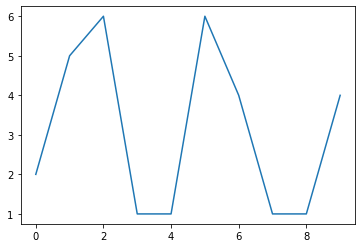

In [3]:
# your code here
sorteddice = dices.sort_values(by=0, ascending=False)
plt.plot(dice())

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

(array([5., 2., 0., 1., 1., 1.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <a list of 6 Patch objects>)

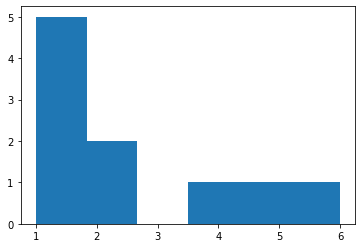

In [4]:
# your code here
plt.hist(dice(), bins = 6)

In [5]:
"""
your comments here:
It shows us how often every number was obtained from throwing the die 10 times
"""

'\nyour comments here:\nIt shows us how often every number was obtained from throwing the die 10 times\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [179]:
# your code here
throws = dice(5)
def ur_mean (x=10):
    if type(x)==list or type(x)==pd.core.series.Series:
        y = list(x)
        return (sum(y))/len(y)
    elif type(x)==int:
        return (sum(dice(x)))/x

print(throws)
print(ur_mean(throws))

[2, 4, 1, 5, 3]
3.0


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [209]:
# your code here
def modice (x=10):
    if type(x)==list:
        numbers = [i+1 for i in range(6)]
        occurences = [x.count(i) for i in numbers]
        df = pd.DataFrame(zip(numbers, occurences)) 
    elif type(x)==int:
        throws = dice(x)
        numbers = [i+1 for i in range(6)]
        occurences = [throws.count(i) for i in numbers]
        df = pd.DataFrame(zip(numbers, occurences))
    #df = df.set_index(0)
    return df

modice()

,0,1
0,1,1
1,2,3
2,3,2
3,4,1
4,5,1
5,6,2


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [144]:
# your code here
throws1 = dice(4)
throws2 = pd.DataFrame(dice(4))
#print(list(throws2[0]))
#print(throws2)

def medice (x=10, column=None):
    
    # Input is a list or pandas
    if type(x) == list or type(x)==pd.core.series.Series:
        z = list(x)
        z.sort()
        if len(z)%2 == 1:
            return z[int(len(z)/2)]
        elif len(z)%2 == 0:
            return (z[int(len(z)/2)-1]+z[int(len(z)/2)])/2
    
    # Input is an integer
    elif type(x) == int:
        y = dice(x)
        y.sort()
        if x%2 == 1:
            return y[int(x/2)]
        elif x%2 == 0:
            return (y[int(x/2)-1]+y[int(x/2)])/2  
    
    
    # Input is a pandas dataframe - column can be specified or not specified (then column 0)
    elif type(x)==pd.core.frame.DataFrame:
        if column == None:
            z = list(x[0])
            z.sort()
            if len(z)%2 == 1:
                return z[int(len(z)/2)]
            elif len(z)%2 == 0:
                return (z[int(len(z)/2)-1]+z[int(len(z)/2)])/2 
        elif column != None:
            z = list(x[column])
            z.sort()
            if len(z)%2 == 1:
                return z[int(len(z)/2)]
            elif len(z)%2 == 0:
                return (z[int(len(z)/2)-1]+z[int(len(z)/2)])/2 
            
    """
    # Input is a pandas series
    elif type(x)==pd.core.series.Series:
        z = list(x)
        z.sort()
        if len(z)%2 == 1:
            return z[int(len(z)/2)]
        elif len(z)%2 == 0:
            return (z[int(len(z)/2)-1]+z[int(len(z)/2)])/2
    """

        
print(medice(throws2, 0))
#print(medice(throws1))

3.5


In [145]:
def medlist (y):
    x = list(y)
    x.sort()
    if len(x)%2 == 1:
        return x[int(len(x)/2)]
    elif len(x)%2 == 0:
        return (x[int(len(x)/2)-1]+x[int(len(x)/2)])/2

def medint (x):
    # Input is an integer
    y = dice(x)
    y.sort()
    if x%2 == 1:
        return y[int(x/2)]
    elif x%2 == 0:
        return (y[int(x/2)-1]+y[int(x/2)])/2 

    """
def medseries (x):
    z = list(x)
    z.sort()
    if len(z)%2 == 1:
        return z[int(len(z)/2)]
    elif len(z)%2 == 0:
        return (z[int(len(z)/2)-1]+z[int(len(z)/2)])/2    
    """

def meddf (x, column=None):
    if column == None:
        z = list(x[0])
        z.sort()
        if len(z)%2 == 1:
            return z[int(len(z)/2)]
        elif len(z)%2 == 0:
            return (z[int(len(z)/2)-1]+z[int(len(z)/2)])/2 
    elif column != None:
        z = list(x[column])
        z.sort()
        if len(z)%2 == 1:
            return z[int(len(z)/2)]
        elif len(z)%2 == 0:
            return (z[int(len(z)/2)-1]+z[int(len(z)/2)])/2 

def medjan (x=10, column=None):
    # Input is a list or pandas series
    if type(x) == list or type(x)==pd.core.series.Series:
        return medlist(x)
    # Input is an integer    
    elif type(x) == int:
        return medint(x)
    # Input is a pandas dataframe - column can be specified or not specified (then column 0)
    elif type(x)==pd.core.frame.DataFrame:
        return meddf(x, column)

l = pd.DataFrame([2,4,1,5,5,6])
print(medjan(l))

4.5


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [228]:
# your code here
test = [1,2,3,4,5,6]
def quartice (x, number='all'):
    if (type(x) == list) or type(x)==pd.core.series.Series:
        y = list(x)
        y.sort()
        # first quartile:  
        sublist1 = y[0:(int(len(x)/2))]
        q1 = medjan(sublist1)
        # median
        q2 = medjan(x)
        # third quartile
        if len(y)%2 == 0:
            sublist2 = y[(int(len(x)/2)):]
        elif len(y)%2 == 1:
            sublist2 = y[(int(len(x)/2))+1:]
        q3 = medjan(sublist2)
        
        if number == 'all':
            print(f" First quartile: {q1} \n Median: {q2} \n Third quartile: {q3} ")
            return q1, q2, q3
        elif number == 1:
            print(f" First quartile: {q1}")
            return q1
        elif number == 2:
            print(f" Median: {q2}")
            return q2
        elif number == 3:
            print(f" Third quartile: {q3}")  
            return q3
    
    #medjan()
quartice(test)

 First quartile: 2 
 Median: 3.5 
 Third quartile: 5 


(2, 3.5, 5)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [147]:
# your code here
data_dice = pd.read_csv("../data/roll_the_dice_hundred.csv")

In [156]:
data_dice.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


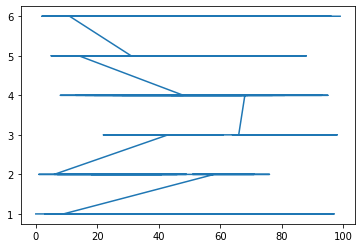

In [152]:
sordice = data_dice.sort_values(by = 'value', ascending = False)
plt.plot(sordice['value'])

(array([12., 17., 14., 22., 12., 23.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <a list of 6 Patch objects>)

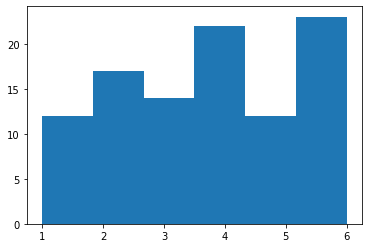

In [155]:
plt.hist(sordice['value'], bins = 6)

In [ ]:
"""
your comments here:
The first plot doesn't really give us any valuable information.
The histogram shows us the distribution of the results, where we see a tendency for a uniform distribution.
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [182]:
"""
"""

# your code here
# mean:
print("Mean:")
print(ur_mean(data_dice['value']))

# median
print("Median:")
print(medjan(data_dice, 'value'))

# Checking results:
print("Checking results:")
print(data_dice['value'].mean())
print(data_dice['value'].median())

Mean:
3.74
Median:
4.0
Checking results:
3.74
4.0


#### 3.- Now, calculate the frequency distribution.


In [191]:
# your code here
fdist = modice(list(data_dice['value']))
fdist

,0,1
0,1,12
1,2,17
2,3,14
3,4,22
4,5,12
5,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

(array([12., 17., 14., 22., 12., 23.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <a list of 6 Patch objects>)

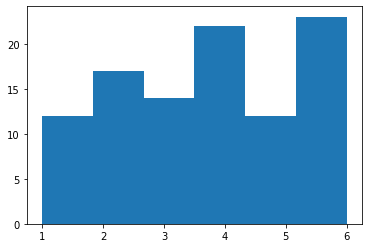

In [197]:
# your code here
plt.hist(data_dice['value'], bins = 6)


In [ ]:
"""
your comments here:
The histogram shows us the distribution of the results, where we see a tendency for a uniform distribution.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [199]:
# your code here
dice1000 = pd.read_csv("../data/roll_the_dice_thousand.csv")

In [200]:
dice1000.head()

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5


(array([175., 167., 175., 168., 149., 166.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <a list of 6 Patch objects>)

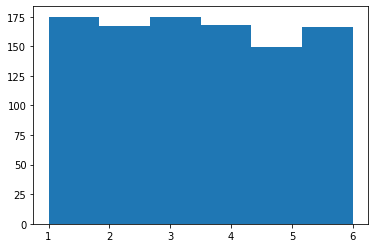

In [202]:
plt.hist(dice1000['value'], bins = 6)

In [203]:
"""
your comments here:
It is now even more evident, that throwing dice follows a uniform distribution
"""

'\nyour comments here:\nIt is now even more evident, that throwing dice follows a uniform distribution\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [216]:
# your code here
data_ages = pd.read_csv("../data/ages_population.csv")

In [210]:
data_ages.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


In [ ]:
# According to my estimate the mean lies between 33 and 38 and the std should be around 15

In [206]:
data_ages.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


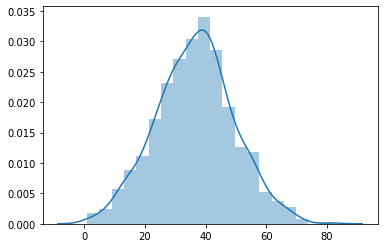

In [207]:
sns.distplot(data_ages, bins= 20)

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [214]:
# your code here
print('Mean', data_ages.mean())
print('STD', data_ages.std())
# falls within my guess

observation    36.56
dtype: float64
observation    12.8165
dtype: float64


In [ ]:
"""
your comments here:
falls within my guess
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [217]:
# your code here
data_ages2 = pd.read_csv("../data/ages_population2.csv")

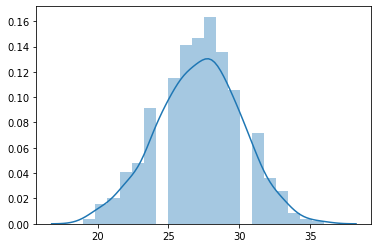

In [222]:
sns.distplot(data_ages2, bins= 20)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here:
The ages are much lower than in the previous example.
two age groups seem to be cut out because some ages are not represented anymore
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [220]:
# your code here
print('Mean', data_ages2.mean())
print('STD', data_ages2.std())

Mean observation    27.155
dtype: float64
STD observation    2.969814
dtype: float64


In [ ]:
"""
your comments here
The mean and especially the standard deviation have decreased
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [223]:
# your code here
data_ages3 = pd.read_csv("../data/ages_population3.csv")

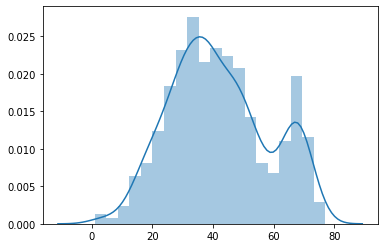

In [224]:
sns.distplot(data_ages3, bins= 20)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [225]:
# your code here
print('Mean', data_ages3.mean())
print('STD', data_ages3.std())

Mean observation    41.989
dtype: float64
STD observation    16.144706
dtype: float64


In [ ]:
"""
your comments here:
A lot of additional old people between 60 and 75 are added to the data set. 
The mean and std are much higher now
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [229]:
# your code here
quartice(data_ages3['observation'])

 First quartile: 30.0 
 Median: 40.0 
 Third quartile: 53.0 


(30.0, 40.0, 53.0)

In [ ]:
"""
your comments here:
The median is around the same range as the mean in this set. 
All quartiles are high compared to the mean of the other data_age files.
No normal distribution anymore
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [232]:
# your code here
np.percentile(data_ages3['observation'], 95)

70.0

In [ ]:
"""
your comments here.
Although this dataset is contains an old population by average there are no particularly old people represented.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""